In [43]:
import numpy as np
import pandas as pd
from additional import DatasetGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

from sklearn.metrics import mean_squared_error
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler


import warnings
warnings.filterwarnings('ignore')

In [44]:
RELIANCE = pd.read_csv("D:/time-series-stock-pred/equities/RELIANCE.csv")

In [45]:
RELIANCE.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7104,2024-04-15,2922.000000,2964.250000,2892.649902,2929.649902,2929.649902,6451031
7105,2024-04-16,2906.699951,2942.350098,2901.850098,2931.500000,2931.500000,4683092
7106,2024-04-18,2927.000000,2972.000000,2918.699951,2928.649902,2928.649902,9502846
7107,2024-04-19,2913.550049,2948.000000,2886.050049,2940.250000,2940.250000,7870889
7108,2024-04-22,2944.899902,2965.649902,2935.600098,2959.699951,2959.699951,5175181


In [46]:
RELIANCE.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,14.638248,14.716795,14.541850,14.691803,9.302444,52060684
1,1996-01-02,14.656100,14.727506,14.470444,14.577553,9.230103,84371654
2,1996-01-03,14.816763,15.491551,14.656100,14.688232,9.300182,104661939
3,1996-01-04,14.548991,14.595404,14.356194,14.552561,9.214277,108450132
4,1996-01-05,14.495436,14.495436,14.327632,14.452592,9.150981,83354233


In [47]:
RELIANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7109 non-null   object 
 1   Open       7109 non-null   float64
 2   High       7109 non-null   float64
 3   Low        7109 non-null   float64
 4   Close      7109 non-null   float64
 5   Adj Close  7109 non-null   float64
 6   Volume     7109 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 388.9+ KB


In [48]:
RELIANCE["Date"] = pd.to_datetime(RELIANCE["Date"])

In [49]:
ed_date = '2023-06-01'
RELIANCE_Train_X, RELIANCE_Train_Y, RELIANCE_Test_X, RELIANCE_Test_Y,scale = DatasetGenerator.Dataset(RELIANCE, ed_date)

In [50]:
def LSTM_model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [51]:
lstm = LSTM_model()
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 200)            161600    
                                                                 
 lstm_3 (LSTM)               (None, 200)               320800    
                                                                 
 dense_4 (Dense)             (None, 200)               40200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 5)                 255       
                                                                 
Total params: 548,005
Trainable params: 548,005
Non-tr

In [52]:
lstm.compile(optimizer=Adam(learning_rate=3e-4), loss = 'mse', metrics=[RootMeanSquaredError()])

In [53]:
history = lstm.fit(RELIANCE_Train_X,RELIANCE_Train_Y, epochs= 100,validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y))

Epoch 1/100
44/44 [==============================] - 4s 37ms/step - loss: 0.0554 - root_mean_squared_error: 0.2354 - val_loss: 0.0667 - val_root_mean_squared_error: 0.2582
Epoch 2/100
44/44 [==============================] - 1s 29ms/step - loss: 0.0015 - root_mean_squared_error: 0.0388 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0404
Epoch 3/100
44/44 [==============================] - 1s 27ms/step - loss: 2.2007e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 4/100
44/44 [==============================] - 1s 27ms/step - loss: 1.9488e-04 - root_mean_squared_error: 0.0140 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 5/100
44/44 [==============================] - 1s 27ms/step - loss: 2.0488e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0368
Epoch 6/100
44/44 [==============================] - 1s 29ms/step - loss: 1.9101e-04 - root_mean_squared_error: 0.0138 - val_los

In [54]:
history_dict = history.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

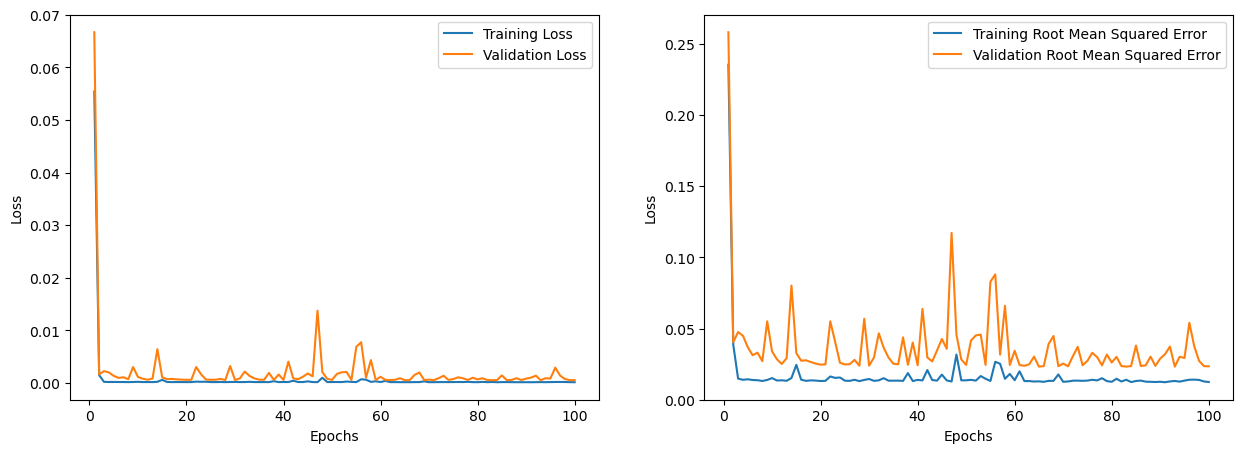

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [56]:
prediction_scaled = lstm.predict(RELIANCE_Test_X)

2/2 [==============================] - 0s 6ms/step


In [57]:
prediction_scaled = prediction_scaled.reshape(-1, 1)

In [58]:
prediction = prediction_scaled/scale

In [79]:
RELIANCE_Test_Y = RELIANCE_Test_Y/scale

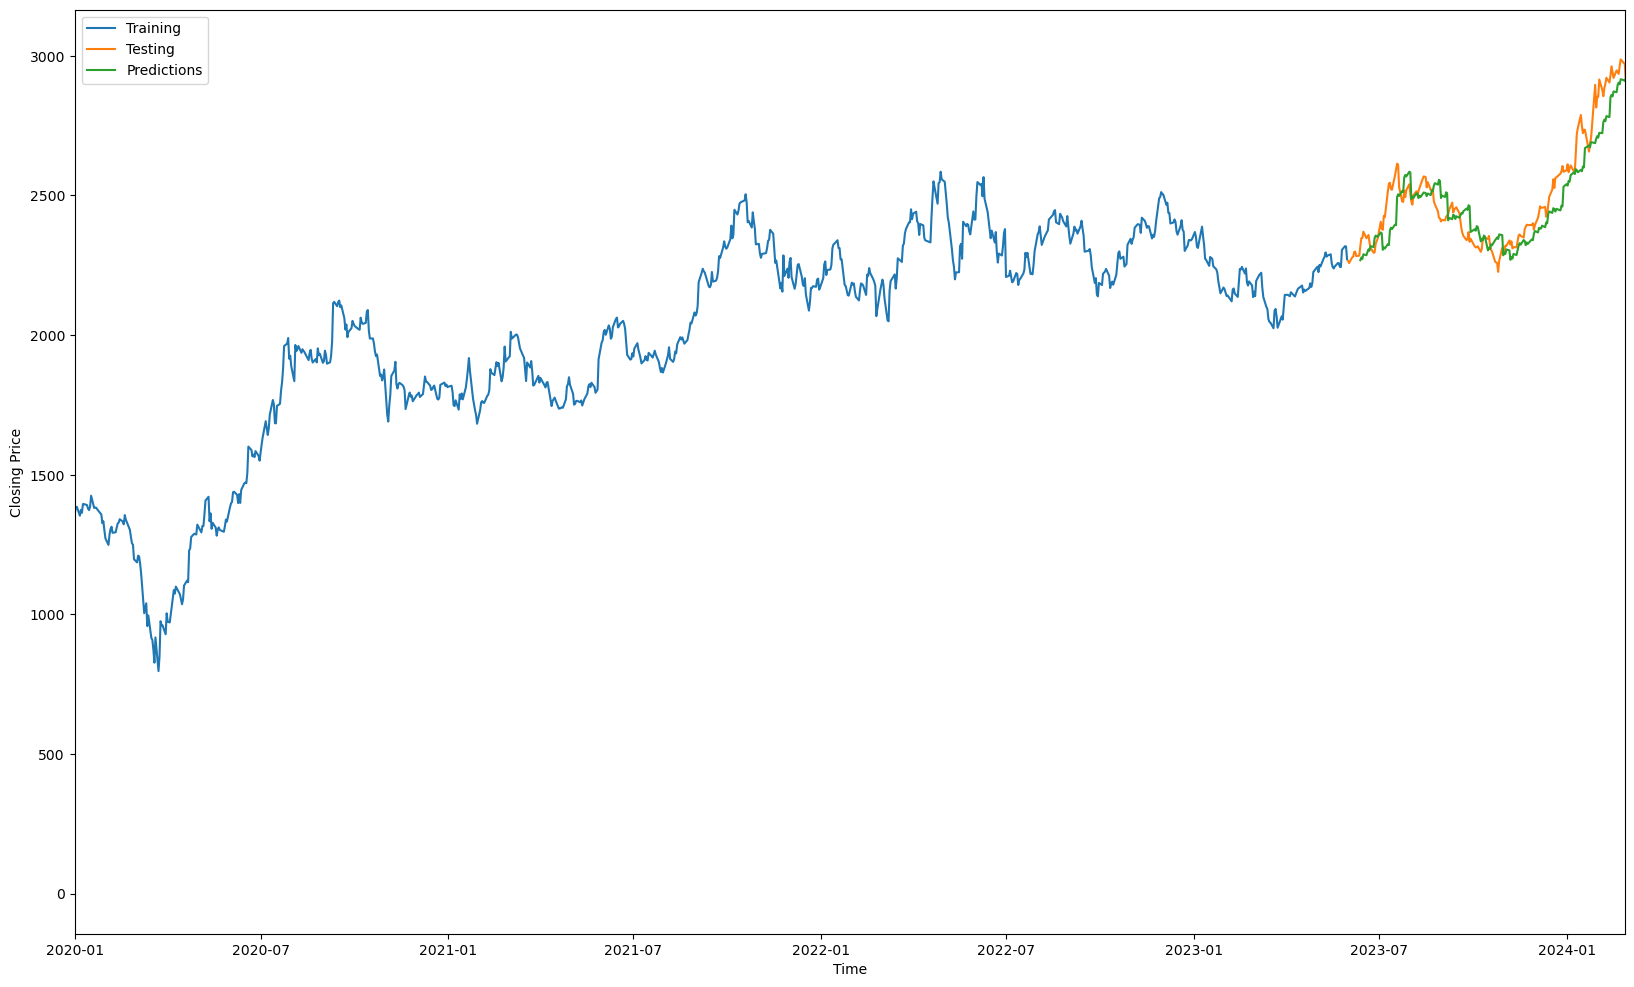

In [60]:
plt.figure(figsize=(20,12))
plt.plot(RELIANCE['Date'][RELIANCE['Date'] < '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] < '2023-06-01'], label = 'Training')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] >= '2023-06-01'], label = 'Testing')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-13'], prediction.reshape(-1), label = 'Predictions')
plt.xlim(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-02-27"))
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [62]:
RELIANCE_Test_Y.reshape(-1,5).shape

(42, 5)

In [63]:
prediction.reshape(-1,5).shape

(42, 5)

In [80]:
import math
rmse = math.sqrt(mean_squared_error(RELIANCE_Test_Y.reshape(-1, 5),prediction.reshape(-1,5)))
mape = np.mean(np.abs(prediction.reshape(-1,5) - RELIANCE_Test_Y.reshape(-1, 5))/np.abs(RELIANCE_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 60.43291275323968
MAPE: 0.01863161031804684


In [81]:
lstm.save("model.h5")

## Model Optimization

In [65]:
import math
def scheduler(epoch):

  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150)
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)

  return lrate

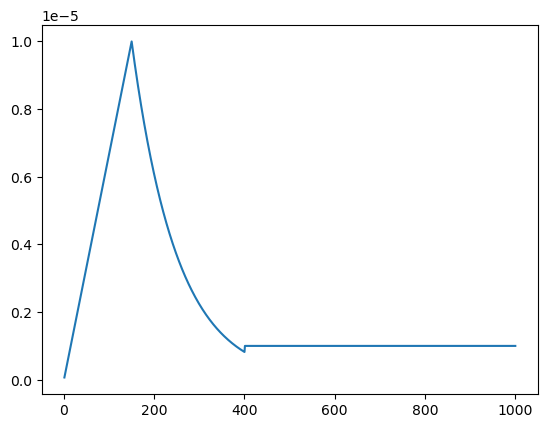

In [66]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [67]:
opt_lstm = LSTM_model()
opt_lstm.compile(optimizer=Adam(), loss = 'mse', metrics=RootMeanSquaredError())

In [68]:
history_opt = opt_lstm.fit(RELIANCE_Train_X, RELIANCE_Train_Y, epochs = 1000, validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y), callbacks=LearningRateScheduler(scheduler
                                                                                                                                                                    ))

Epoch 1/1000
44/44 [==============================] - 4s 36ms/step - loss: 0.0987 - root_mean_squared_error: 0.3141 - val_loss: 0.9912 - val_root_mean_squared_error: 0.9956 - lr: 0.0000e+00
Epoch 2/1000
44/44 [==============================] - 1s 30ms/step - loss: 0.0986 - root_mean_squared_error: 0.3141 - val_loss: 0.9911 - val_root_mean_squared_error: 0.9955 - lr: 6.6667e-08
Epoch 3/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0986 - root_mean_squared_error: 0.3140 - val_loss: 0.9909 - val_root_mean_squared_error: 0.9954 - lr: 1.3333e-07
Epoch 4/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0986 - root_mean_squared_error: 0.3140 - val_loss: 0.9905 - val_root_mean_squared_error: 0.9952 - lr: 2.0000e-07
Epoch 5/1000
44/44 [==============================] - 1s 28ms/step - loss: 0.0985 - root_mean_squared_error: 0.3139 - val_loss: 0.9899 - val_root_mean_squared_error: 0.9950 - lr: 2.6667e-07
Epoch 6/1000
44/44 [==============================

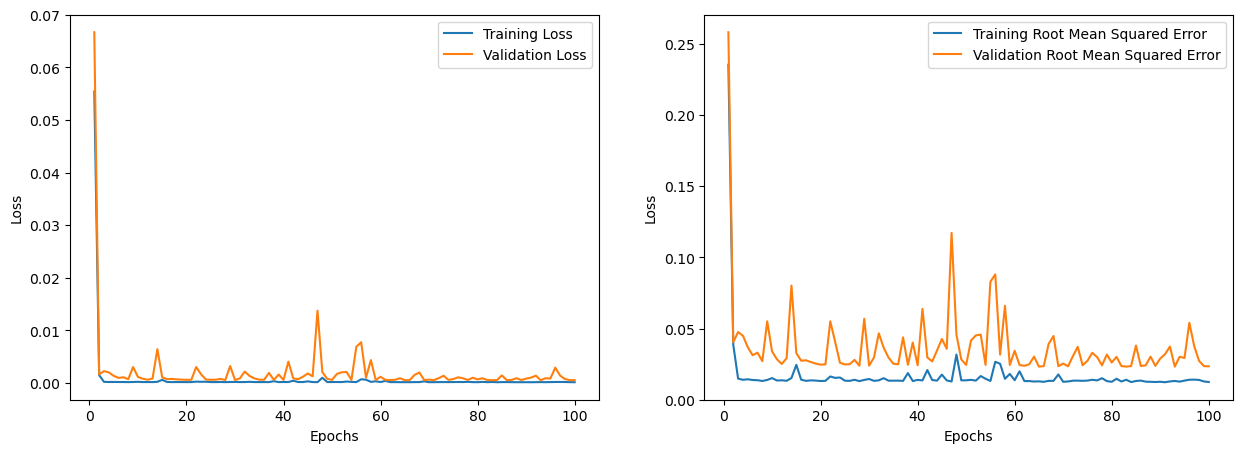

In [69]:
history_dict_2 = history.history

loss = history_dict_2["loss"]
root_mean_squared_error = history_dict_2["root_mean_squared_error"]
val_loss = history_dict_2["val_loss"]
val_root_mean_squared_error = history_dict_2["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [70]:
prediction_1 =opt_lstm.predict(RELIANCE_Test_X) 

2/2 [==============================] - 0s 6ms/step


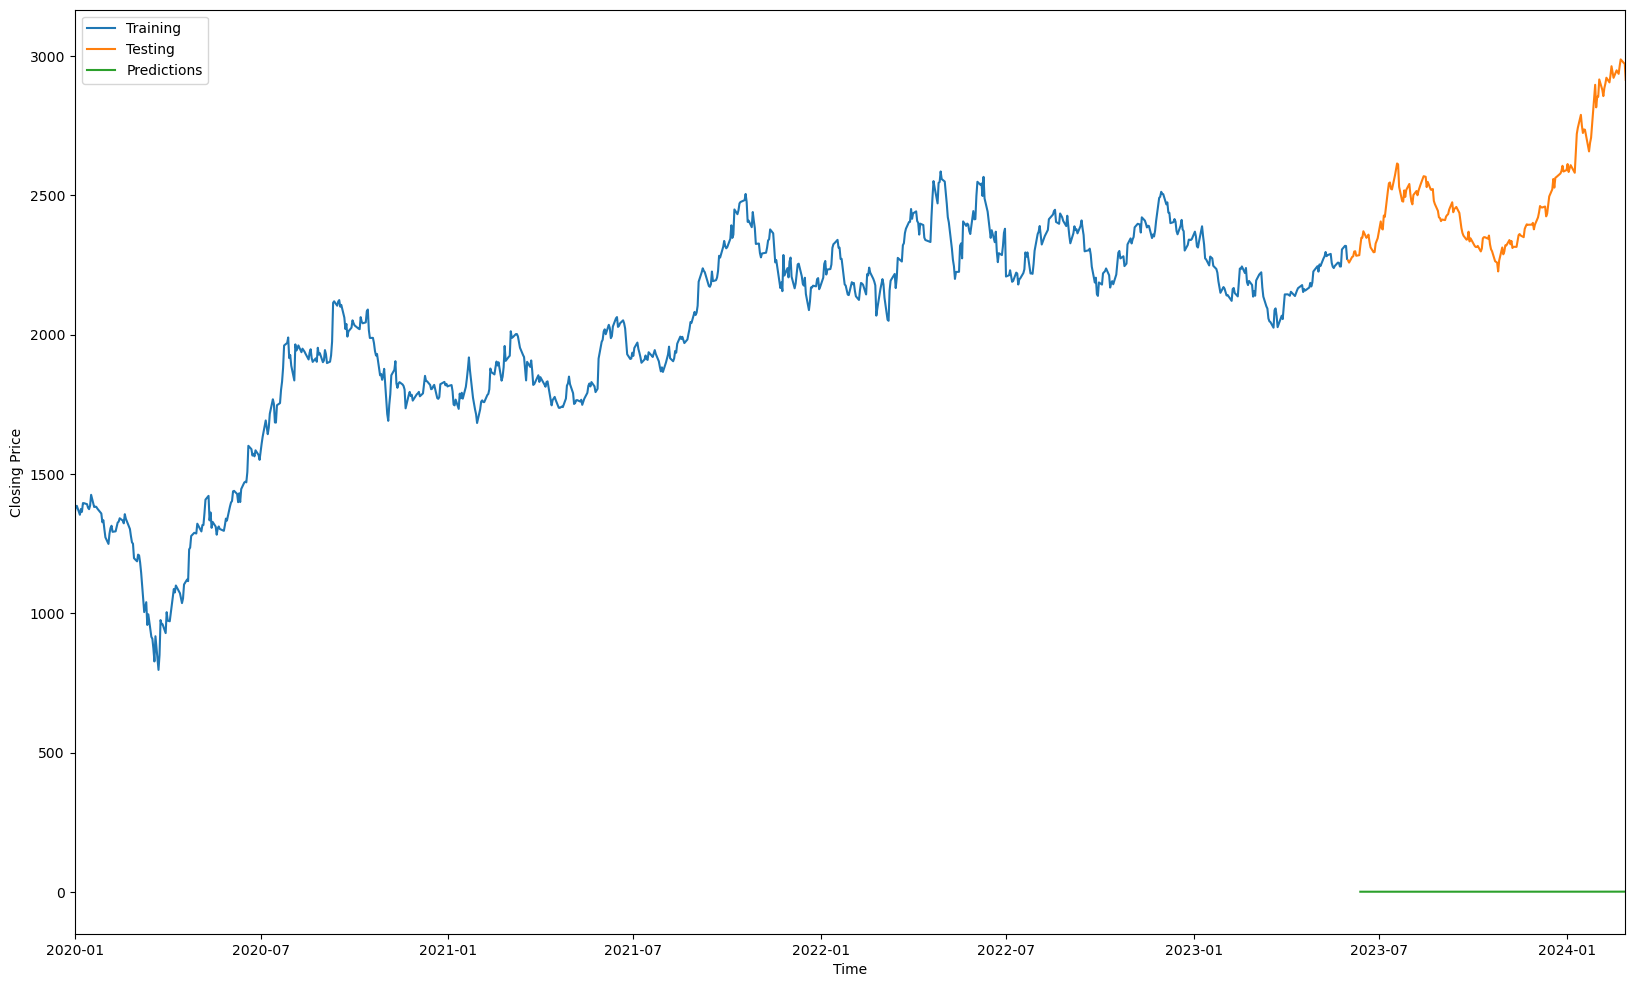

In [71]:
plt.figure(figsize=(20,12))
plt.plot(RELIANCE['Date'][RELIANCE['Date'] < '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] < '2023-06-01'], label = 'Training')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-01'], RELIANCE['Adj Close'][RELIANCE['Date'] >= '2023-06-01'], label = 'Testing')
plt.plot(RELIANCE['Date'][RELIANCE['Date'] >= '2023-06-13'], prediction_1.reshape(-1), label = 'Predictions')
plt.xlim(pd.Timestamp("2020-01-01"),pd.Timestamp("2024-02-27"))
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc = 'best')

In [72]:
import math
rmse = math.sqrt(mean_squared_error(RELIANCE_Test_Y.reshape(-1, 5),prediction_1))
mape = np.mean(np.abs(prediction_1 - RELIANCE_Test_Y.reshape(-1, 5))/np.abs(RELIANCE_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 0.024703299409753767
MAPE: 0.020083583072648976


## Optimization - 2 

In [73]:
opt_lstm_2 = LSTM_model()
opt_lstm_2.compile(optimizer=Adam(learning_rate=0.001), loss = 'mse', metrics=RootMeanSquaredError())

In [74]:
history_opt_2 = opt_lstm_2.fit(RELIANCE_Train_X, RELIANCE_Train_Y, epochs = 1000, validation_data = (RELIANCE_Test_X, RELIANCE_Test_Y))

Epoch 1/1000
44/44 [==============================] - 4s 37ms/step - loss: 0.0283 - root_mean_squared_error: 0.1682 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0739
Epoch 2/1000
44/44 [==============================] - 1s 30ms/step - loss: 4.0367e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0422
Epoch 3/1000
44/44 [==============================] - 1s 28ms/step - loss: 2.3527e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 4/1000
44/44 [==============================] - 1s 28ms/step - loss: 1.9588e-04 - root_mean_squared_error: 0.0140 - val_loss: 6.0690e-04 - val_root_mean_squared_error: 0.0246
Epoch 5/1000
44/44 [==============================] - 1s 30ms/step - loss: 1.9864e-04 - root_mean_squared_error: 0.0141 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0337
Epoch 6/1000
44/44 [==============================] - 1s 27ms/step - loss: 2.3296e-04 - root_mean_squared_error: 0.

KeyboardInterrupt: 